Analizowane dane pochodzą z głównego urzędu statystycznego. Zawierają informacje dotyczące ludności w polsce, między innymi: liczba ludności, liczba urodzeń i śmierci oraz ilość małżeństw i rozwodów, ale będę się skupiał na tych pierwszych trzech. Dane są podane w tysiącach i powstały w wyniku obserwacji GUS.

In [2]:
library(readxl)
people <- read_xlsx(path = "tabl07_stan_i_ruch_naturalny_ludnosci.xlsx", sheet = "Wartosci")
colnames(people) = c('year', 'month', 'population', 'marriages', 'separations', 'divorces', 'live_births', 'deaths', 'infant_deaths', 'nat_inc')

In [9]:
head(people)
tail(people)


year,month,population,marriages,separations,divorces,live_births,deaths,infant_deaths,nat_inc
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2010,0,.,8.2,.,.,38.8,33.7,0.2,5.1
2010,1,.,5.9,.,.,34.4,29.7,0.2,4.7
2010,2,.,4.6,0.7,15.7,30.3,31.7,0.2,-1.4
2010,3,.,19.1,.,.,36.6,31.0,0.2,5.6
2010,4,.,15.3,.,.,38.3,31.4,0.2,6.9
2010,5,.,32.7,0.7,15.7,29.5,29.9,0.2,-0.4


year,month,population,marriages,separations,divorces,live_births,deaths,infant_deaths,nat_inc
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2022,9,37795,14.8,.,.,24.4,36.7,0.1,-12.3
2022,10,37785,4.6,.,.,23.3,33.8,0.1,-10.5
2023,11,37766,6.6,0.2,15.9,22.3,40.6,0.1,-18.3
2023,0,37749,4.0,.,.,25.5,42.5,0.1,-17.0
2023,1,37738,3.5,.,.,21.5,33.0,0.1,-11.5
2023,2,37726,4.0,0.2,15.4,24.5,36.5,0.1,-12.0


In [ ]:
szereg_rozdzielczy <- cut(people$live_births, breaks = 1 + log2(length(people)), include.lowest = TRUE)
summary(szereg_rozdzielczy)


[21.5,25.5] (25.5,29.4] (29.4,33.4] (33.4,37.4] 
          9          42          63          28

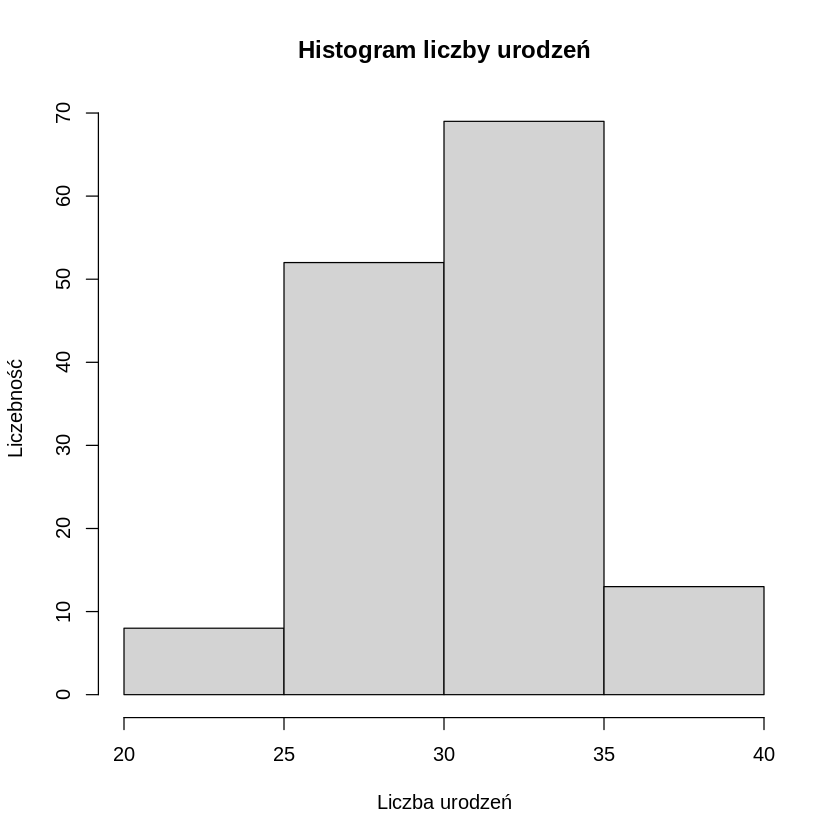

In [ ]:
hist(people$live_births, main = "Histogram liczby urodzeń", xlab = "Liczba urodzeń", ylab = "Liczebność", breaks = 4)


In [ ]:
summary(people$live_births)
sd(people$live_births)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   21.5    28.3    30.8    30.9    33.2    40.1 

[1] 3.521156

Wartość minimalna i maksymalna są znacząco od siebie oddalone, a mediana jest na poziomie średniej. Wartości od pierwszego kwartyla do trzeciego kwartyla koncentrują się w dość wąskim zakresie. Sugeruje to, że większość danych mieści się właśnie tam. Możliwe jest, że dane mają rozkład normalny.

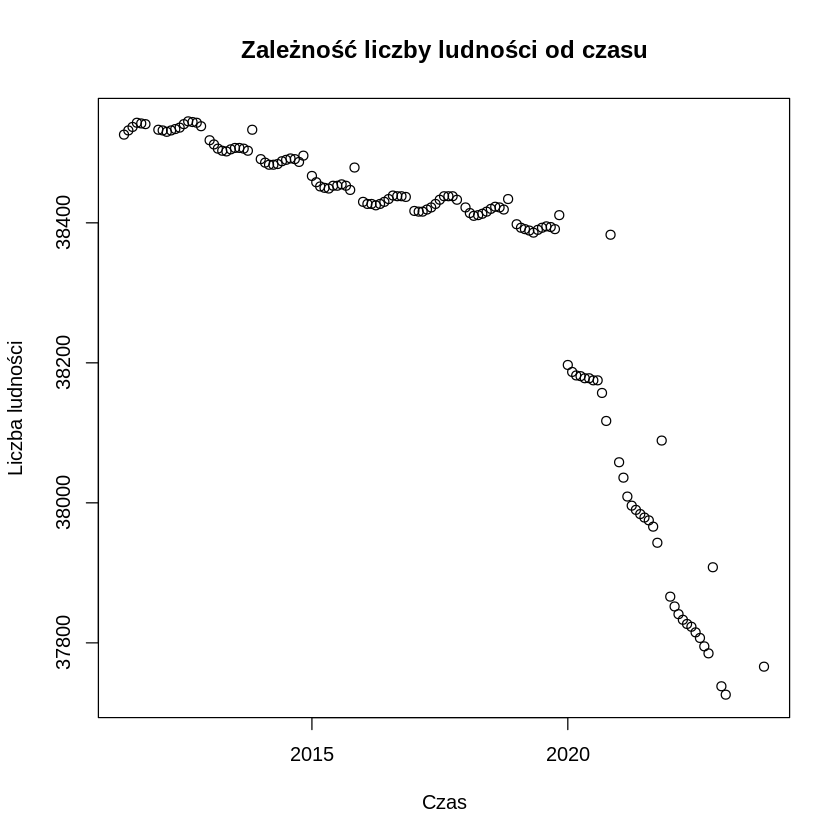

In [ ]:
people <- subset(people, population != '.')
people$Data <- as.Date(paste0(people$year, "-", people$month, "-01"))

plot(people$Data, people$population, type = "p", main = "Zależność liczby ludności od czasu",
     xlab = "Czas", ylab = "Liczba ludności")


Jak widać na powyższych wykresach, liczba urodzeń od 2011 roku przypomina rozkład normalny. Na wykresie liczności ludności od czasu widać jednak, że ilość osób w Polsce spada, co świadczy o przewadze śmierci nad urodzeniami. Można z tego wywnioskować, że liczba urodzeń zamiast zwiększyć się od 2016 roku, zmalała. Aby to sprawdzić należy spojrzeć na wykres urodzeń i śmierci od czasu.

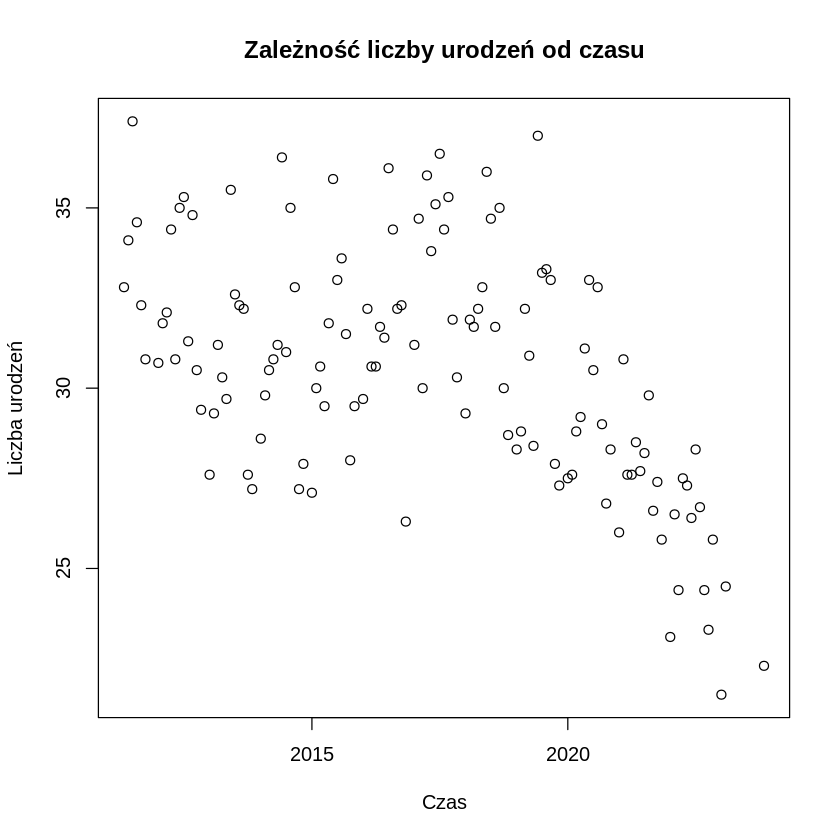

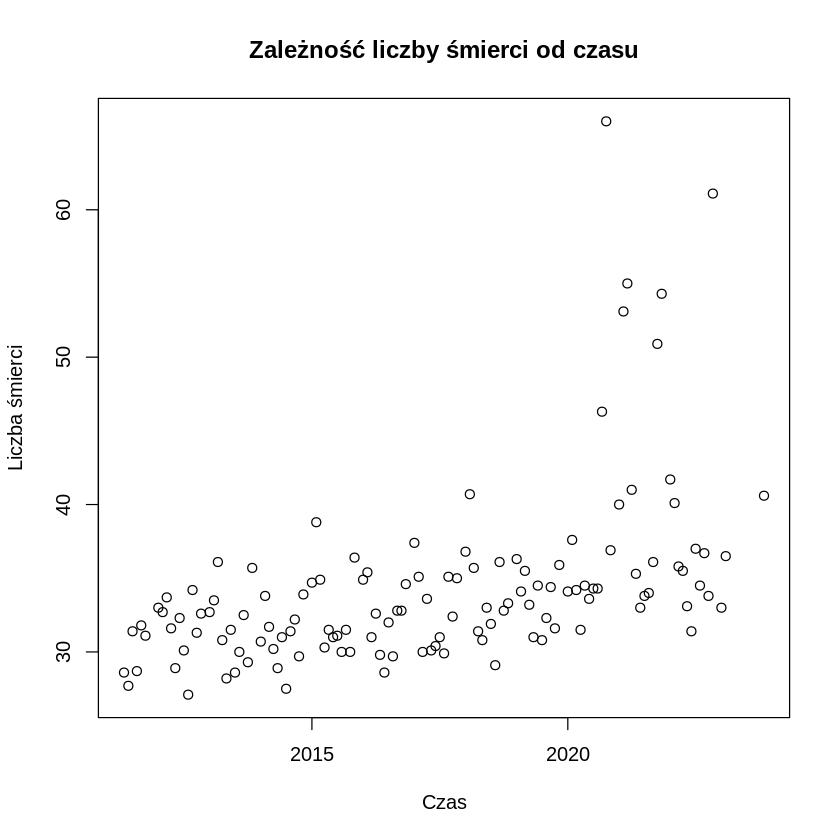

In [ ]:
plot(people$Data, people$live_births, type = "p", main = "Zależność liczby urodzeń od czasu",
     xlab = "Czas", ylab = "Liczba urodzeń")
plot(people$Data, people$deaths, type = "p", main = "Zależność liczby śmierci od czasu",
     xlab = "Czas", ylab = "Liczba śmierci")

Wykresy wskazują na jednoczesne obniżenie się liczby urodzeń i zwiększenie liczby śmierci. Może być to spowodowane pandemią. Dlatego dane od ogłoszenia pandemii powinny nie być brane pod uwagę przy wykonywaniu testu.


In [ ]:
test_data <- subset(people, year < 2020)
test_data$Data <- as.Date(paste0(test_data$year, "-", test_data$month, "-01"))
head(test_data)

year,month,population,marriages,separations,divorces,live_births,deaths,infant_deaths,nat_inc,Data
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2011,5,38526,31.4,0.7,16.5,32.8,28.6,0.2,4.2,2011-05-01
2011,6,38532,22.8,.,.,34.1,27.7,0.1,6.4,2011-06-01
2011,7,38537,38.5,.,.,37.4,31.4,0.2,6.1,2011-07-01
2011,8,38543,31.2,0.6,13.9,34.6,28.7,0.2,6.0,2011-08-01
2011,9,38542,22.1,.,.,32.3,31.8,0.2,0.5,2011-09-01
2011,10,38541,6.2,.,.,30.8,31.1,0.1,-0.3,2011-10-01


O teście:

Hipoteza zerowa - Liczba miesięcznych urodzeń nie zmieniła się po wprowadzeniu programu 500 +

Hipoteza alternatywna - Liczba miesięcznych urodzeń zmieniła się

alpha = 0.05


In [ ]:
grupa_przed <- test_data[test_data$Data < as.Date("2016-04-01"), "live_births"]
grupa_po <- test_data[test_data$Data >= as.Date("2016-04-01"), "live_births"]

test <- t.test(grupa_przed, grupa_po)

print(test)


	Welch Two Sample t-test

data:  grupa_przed and grupa_po
t = -1.2504, df = 83.162, p-value = 0.2147
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.7877075  0.4075879
sample estimates:
mean of x mean of y 
 31.46604  32.15610 



Na podstawie testu można stwierdzić, że nie ma wystarczających dowodów, aby odrzucić hipotezę zerową "liczba urodzeń się nie zmieniła". W tej sytuacji możliwy jest błąd drugiego rodzaju, ale jest on mało prawdopodobny, ponieważ wartość statystyki t jest blisko środka akceptowalnego przedziału.